In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5174999999999998, 1.5525, 1.5875, 1.6225, 1.6574999999999998, 1.6925, 1.7275, 1.7625000000000002, 
     1.7975, 1.8325, 1.8675000000000002, 1.9025000000000003, 1.9375, 1.9725, 2.0075, 2.0425, 2.0775, 2.1125, 
     2.1475, 2.1825, 2.2175000000000002, 2.2525, 2.2875, 2.3225, 2.3575, 2.3925, 2.4275, 2.4625, 2.4975, 
     2.5324999999999998, 2.5675, 2.6025, 2.6375, 2.6725000000000003, 2.7075, 2.7424999999999997, 2.7775, 
     2.8125, 2.8475, 2.8825000000000003, 2.9175000000000004, 2.9524999999999997, 2.9875, 3.0225, 3.0575, 
     3.0925, 3.1275, 3.1625, 3.1975, 3.2325, 3.2675, 3.3025, 3.3375, 3.3725000000000005, 3.4074999999999998, 
     3.4425000000000003, 3.4775, 3.5125, 3.5475, 3.5824999999999996, 3.6174999999999997, 3.6525000000000003, 
     3.6875, 3.7224999999999997, 3.7575000000000003, 3.7925000000000004, 3.8275, 3.8625, 3.8975, 
     3.9324999999999997, 3.9675, 4.0024999999999995, 4.0375, 4.0725, 4.1075, 4.1425, 4.1775, 4.2125, 
     4.2475000000000005, 4.2825, 4.3175, 4.352499999999999, 4.3875, 4.422499999999999, 4.4575, 
     4.492500000000001, 4.5275, 4.5625, 4.5975, 4.632499999999999, 4.6675, 4.702500000000001, 4.7375, 
     4.772500000000001, 4.8075, 4.842499999999999, 4.8775, 4.9125, 4.9475, 4.9825]

start = X[0] - (X[1] - X[0])/2
stop = X[-1] + (X[1] - X[0])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: None
# pairsCuts: None

Y_OS = [121901.0, 116094.0, 108979.0, 103922.0, 98793.0, 92978.0, 88413.0, 84144.0, 79554.0, 75928.0, 
        72198.0, 68404.0, 64648.0, 61973.0, 58571.0, 55637.0, 52708.0, 50121.0, 47898.0, 45844.0, 
        43426.0, 41511.0, 39381.0, 37267.0, 36060.0, 34570.0, 32911.0, 31332.0, 30433.0, 29180.0, 
        27788.0, 26828.0, 26036.0, 24897.0, 24165.0, 23688.0, 23263.0, 23079.0, 23497.0, 24015.0, 
        26326.0, 29328.0, 35040.0, 43877.0, 53671.0, 59383.0, 55279.0, 43117.0, 29126.0, 19892.0, 
        15209.0, 12847.0, 11646.0, 10802.0, 10213.0, 9728.0, 9526.0, 9259.0, 9140.0, 8852.0, 8677.0, 
        8654.0, 8322.0, 8256.0, 7866.0, 7144.0, 6726.0, 6358.0, 6234.0, 6070.0, 5924.0, 5713.0, 
        5478.0, 5385.0, 5212.0, 5012.0, 5002.0, 4765.0, 4662.0, 4542.0, 4428.0, 4279.0, 4246.0, 
        4100.0, 4078.0, 3901.0, 3728.0, 3736.0, 3557.0, 3518.0, 3351.0, 3452.0, 3239.0, 3271.0, 
        3171.0, 3011.0, 2997.0, 2933.0, 2974.0, 2727.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [58564.0, 55328.0, 52212.0, 49312.0, 46491.0, 44467.0, 42220.0, 39821.0, 37376.0, 36045.0, 
        34090.0, 31866.0, 30424.0, 28973.0, 27908.0, 26565.0, 25038.0, 24253.0, 22950.0, 21922.0, 
        21116.0, 19875.0, 19345.0, 18343.0, 17618.0, 16980.0, 16025.0, 15326.0, 14943.0, 14250.0, 
        13710.0, 13194.0, 12817.0, 12382.0, 11936.0, 11506.0, 11110.0, 10555.0, 10270.0, 9744.0, 
        9560.0, 9061.0, 8955.0, 8460.0, 8255.0, 8143.0, 7809.0, 7591.0, 7225.0, 7077.0, 6921.0, 
        6708.0, 6482.0, 6297.0, 6147.0, 5920.0, 5797.0, 5535.0, 5632.0, 5348.0, 5216.0, 5002.0, 
        4887.0, 4854.0, 4677.0, 4398.0, 4301.0, 4425.0, 4269.0, 4140.0, 4035.0, 3944.0, 3855.0, 
        3817.0, 3657.0, 3586.0, 3567.0, 3392.0, 3258.0, 3221.0, 3104.0, 2976.0, 3098.0, 3029.0, 
        2965.0, 2889.0, 2694.0, 2751.0, 2659.0, 2620.0, 2519.0, 2519.0, 2474.0, 2417.0, 2403.0, 
        2365.0, 2232.0, 2241.0, 2157.0, 2067.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [281.0, 304.0, 351.0, 387.0, 441.0, 507.0, 528.0, 617.0, 676.0, 732.0, 824.0, 859.0, 934.0, 1009.0, 
          1140.0, 1259.0, 1323.0, 1477.0, 1614.0, 1729.0, 1815.0, 1908.0, 2120.0, 2215.0, 2394.0, 2716.0, 
          2773.0, 3151.0, 3507.0, 3759.0, 4060.0, 4715.0, 5422.0, 6277.0, 7410.0, 8759.0, 10993.0, 13556.0, 
          17253.0, 22574.0, 30043.0, 42169.0, 61261.0, 92478.0, 134028.0, 166384.0, 158877.0, 107929.0, 
          52680.0, 21127.0, 8315.0, 4032.0, 2468.0, 1525.0, 1092.0, 758.0, 630.0, 451.0, 385.0, 307.0, 
          270.0, 186.0, 179.0, 151.0, 137.0, 114.0, 99.0, 81.0, 65.0, 62.0, 69.0, 49.0, 41.0, 45.0, 46.0, 
          33.0, 33.0, 30.0, 24.0, 24.0, 24.0, 17.0, 15.0, 13.0, 18.0, 9.0, 14.0, 5.0, 7.0, 7.0, 12.0, 9.0, 
          15.0, 6.0, 9.0, 5.0, 8.0, 9.0, 12.0, 8.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [63.0, 79.0, 93.0, 90.0, 95.0, 102.0, 99.0, 117.0, 122.0, 143.0, 125.0, 160.0, 150.0, 185.0, 
         230.0, 221.0, 208.0, 259.0, 302.0, 270.0, 348.0, 332.0, 368.0, 414.0, 452.0, 440.0, 502.0, 
         569.0, 563.0, 653.0, 635.0, 701.0, 747.0, 790.0, 864.0, 867.0, 1026.0, 1006.0, 994.0, 1164.0, 
         1208.0, 1314.0, 1364.0, 1469.0, 1602.0, 1788.0, 1969.0, 2295.0, 2633.0, 3033.0, 3528.0, 4121.0, 
         5102.0, 6046.0, 7358.0, 9186.0, 11599.0, 15436.0, 21528.0, 31255.0, 46006.0, 65437.0, 79386.0, 
         74802.0, 51336.0, 25398.0, 10271.0, 4078.0, 1908.0, 1107.0, 672.0, 512.0, 396.0, 271.0, 221.0, 
         205.0, 153.0, 123.0, 113.0, 94.0, 80.0, 66.0, 50.0, 55.0, 54.0, 45.0, 41.0, 30.0, 35.0, 31.0, 
         17.0, 16.0, 27.0, 28.0, 23.0, 20.0, 17.0, 13.0, 9.0, 9.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [344.0, 383.0, 444.0, 477.0, 536.0, 609.0, 627.0, 734.0, 798.0, 875.0, 949.0, 1019.0, 1084.0, 1194.0, 
        1370.0, 1480.0, 1531.0, 1736.0, 1916.0, 1999.0, 2163.0, 2240.0, 2488.0, 2629.0, 2846.0, 3156.0, 
        3275.0, 3720.0, 4070.0, 4412.0, 4695.0, 5416.0, 6169.0, 7067.0, 8274.0, 9626.0, 12019.0, 14562.0, 
        18247.0, 23738.0, 31251.0, 43483.0, 62625.0, 93947.0, 135630.0, 168172.0, 160846.0, 110224.0, 
        55313.0, 24160.0, 11843.0, 8153.0, 7570.0, 7571.0, 8450.0, 9944.0, 12229.0, 15887.0, 21913.0, 
        31562.0, 46276.0, 65623.0, 79565.0, 74953.0, 51473.0, 25512.0, 10370.0, 4159.0, 1973.0, 1169.0, 
        741.0, 561.0, 437.0, 316.0, 267.0, 238.0, 186.0, 153.0, 137.0, 118.0, 104.0, 83.0, 65.0, 68.0, 
        72.0, 54.0, 55.0, 35.0, 42.0, 38.0, 29.0, 25.0, 42.0, 34.0, 32.0, 25.0, 25.0, 22.0, 21.0, 17.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(100, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 1546805.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_data = y_data[y_data > 0]
y_error = y_error[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

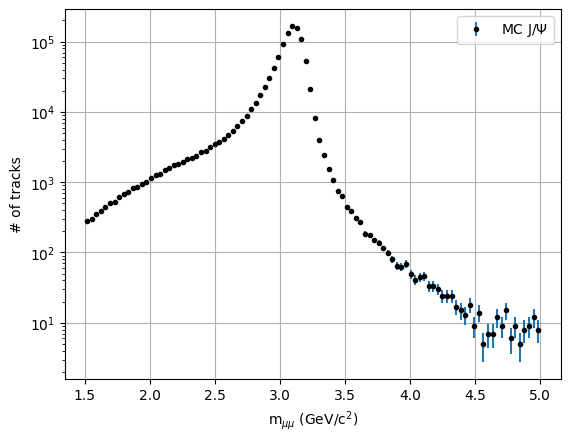

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [170286.2150557018, 3.0989389012820396, 0.0653263846974917, 0.9367839511630349, 2.412291785534917, 2.066564353245788, 2.5470920729465436]
pcov: 
 [[ 1.33600814e+06  1.69006222e-01 -3.58989394e-01 -1.18499538e+00
  -1.08671087e+00 -6.68666590e+00  1.08579180e+01]
 [ 1.69006222e-01  3.27124416e-07 -1.89139083e-07 -5.40727746e-06
   1.13078864e-05 -2.41499359e-06  1.08192326e-06]
 [-3.58989394e-01 -1.89139083e-07  2.63220073e-07  4.62330134e-06
  -7.50334145e-06  6.74951016e-06 -9.63202980e-06]
 [-1.18499538e+00 -5.40727746e-06  4.62330134e-06  2.19246856e-04
  -6.08738374e-04  1.10823507e-04 -1.31257367e-04]
 [-1.08671087e+00  1.13078864e-05 -7.50334145e-06 -6.08738374e-04
   2.33702945e-03 -1.55924290e-04  1.47062890e-04]
 [-6.68666590e+00 -2.41499359e-06  6.74951016e-06  1.10823507e-04
  -1.55924290e-04  1.23187956e-03 -3.41406719e-03]
 [ 1.08579180e+01  1.08192326e-06 -9.63202980e-06 -1.31257367e-04
   1.47062890e-04 -3.41406719e-03  1.35833055e-02]]
residual: 
 {'nfev': 32, '

fit error : 1155.8581890235412


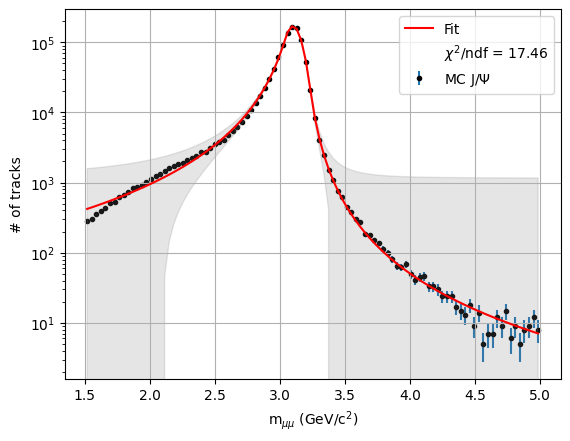

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

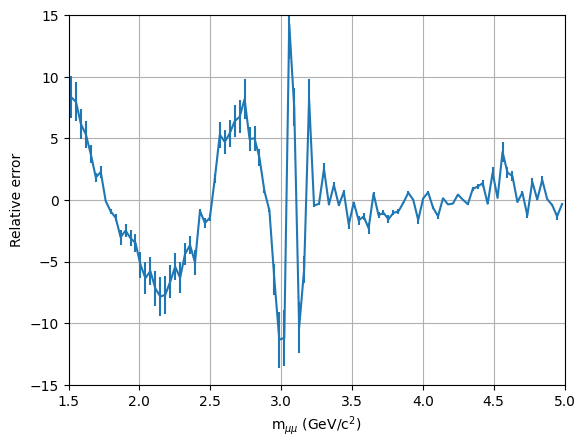

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_data = y_data[y_data > 0]
y_error = y_error[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

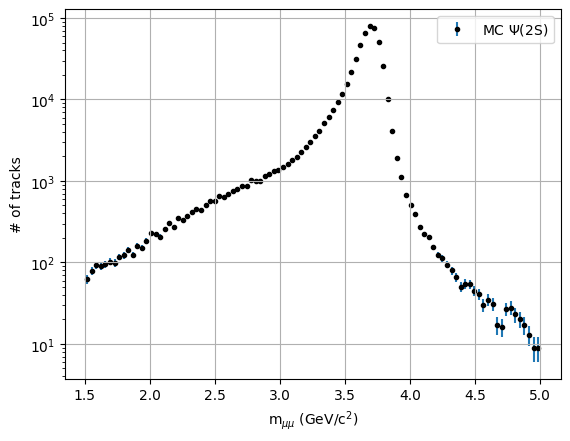

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [80991.25576900254, 3.6924117095187228, 0.06666953639498885, 0.9045911311476983, 2.376511486993353, 2.1433738051630855, 2.275505516976321]
pcov: 
 [[ 4.03350743e+05  1.13103586e-01 -2.35642610e-01 -6.70510181e-01
  -8.29105592e-01 -4.69404938e+00  8.43167322e+00]
 [ 1.13103586e-01  4.70012825e-07 -2.75313974e-07 -6.88142089e-06
   1.25262396e-05 -3.70496961e-06  2.72627864e-06]
 [-2.35642610e-01 -2.75313974e-07  3.77454070e-07  5.92299314e-06
  -8.17935035e-06  1.01014264e-05 -1.57641146e-05]
 [-6.70510181e-01 -6.88142089e-06  5.92299314e-06  2.41251334e-04
  -5.88901059e-04  1.48116534e-04 -1.97624269e-04]
 [-8.29105592e-01  1.25262396e-05 -8.17935035e-06 -5.88901059e-04
   2.07245389e-03 -1.74252888e-04  1.89348611e-04]
 [-4.69404938e+00 -3.70496961e-06  1.01014264e-05  1.48116534e-04
  -1.74252888e-04  1.94933182e-03 -5.30073300e-03]
 [ 8.43167322e+00  2.72627864e-06 -1.57641146e-05 -1.97624269e-04
   1.89348611e-04 -5.30073300e-03  1.94699665e-02]]
residual: 
 {'nfev': 9, '

fit error : 635.099021059286


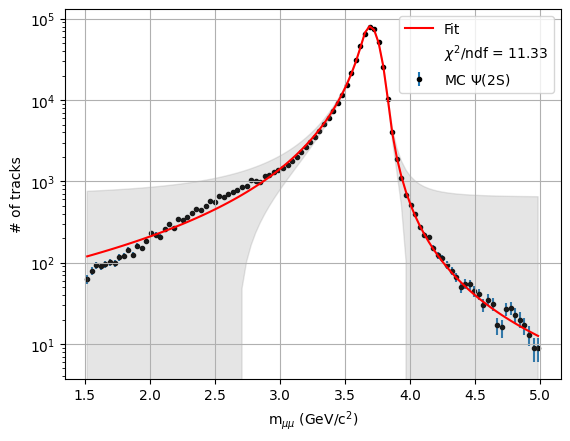

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

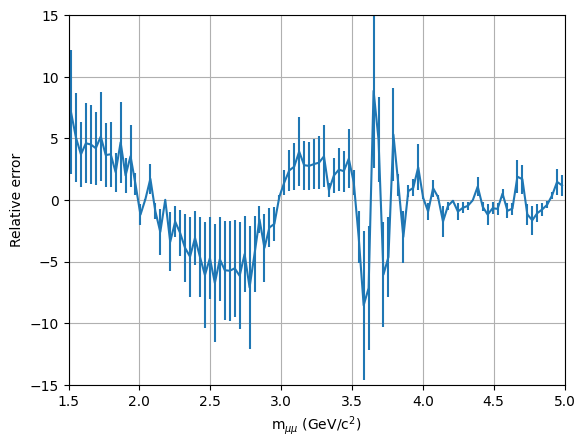

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_data = y_data[y_data > 0]
y_error = y_error[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

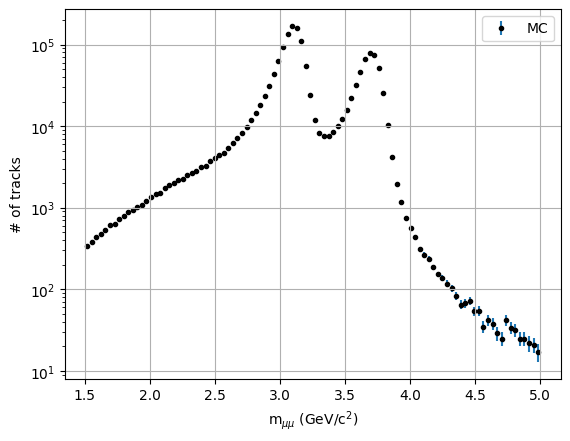

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [170142.9364913617, 3.0987043149099205, 0.06543229550420228, 81035.49001814517, 3.6923995503795126, 0.06664868821115794]
pcov: 
 [[ 1.52414622e+06  1.38402425e-01 -3.49462884e-01 -4.26044540e+03
  -1.36633694e-02  1.65700058e-02]
 [ 1.38402425e-01  2.08280806e-07 -5.49187584e-08 -5.84605518e-04
   2.00916715e-09 -5.36441965e-10]
 [-3.49462884e-01 -5.49187584e-08  1.46204242e-07  8.85487201e-03
   1.95594043e-08 -2.60108185e-08]
 [-4.26044540e+03 -5.84605518e-04  8.85487201e-03  6.98133010e+05
   1.60858621e-01 -3.51032067e-01]
 [-1.36633694e-02  2.00916715e-09  1.95594043e-08  1.60858621e-01
   4.69813700e-07 -1.65674271e-07]
 [ 1.65700058e-02 -5.36441965e-10 -2.60108185e-08 -3.51032067e-01
  -1.65674271e-07  3.34388394e-07]]
residual: 
 {'nfev': 5, 'fvec': array([ 10.67799509,   9.47363211,   7.24390085,   6.86501944,
         5.33401221,   3.46607884,   4.20615685,   1.44462447,
         0.68360147,  -0.3309379 ,  -1.03030261,  -1.41142038,
        -1.46337216,  -2.61830999, 

fit error : 1490.7311063439538


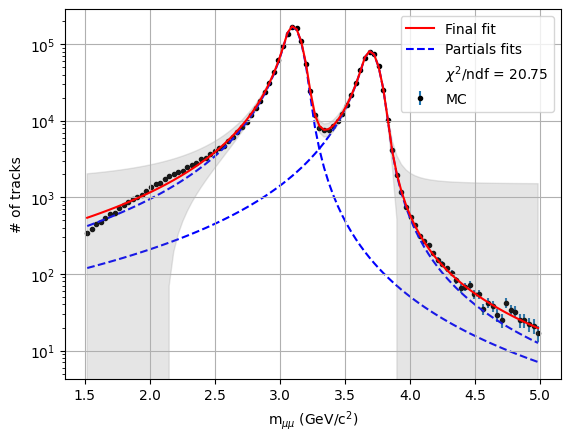

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

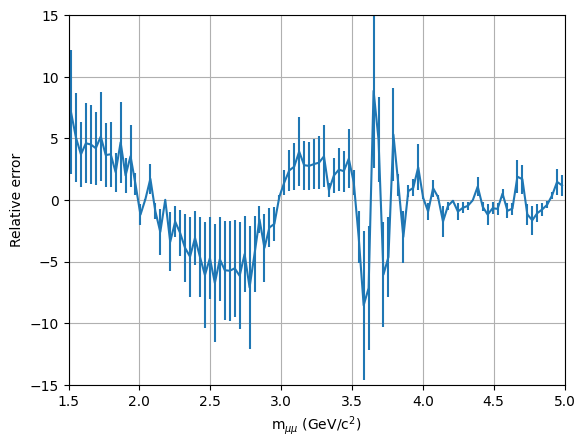

In [24]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_data = y_data[y_data > 0]
y_error = y_error[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

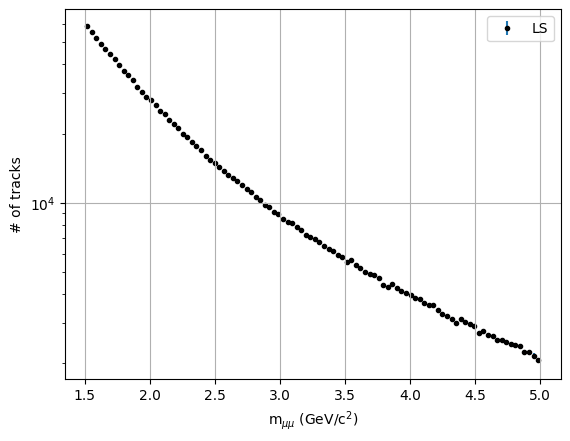

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [11.00836768182471, 9.606841040394261, 8.684978967877058, 8.416668734314868, 7.648225248937293]
pcov: 
 [[ 5.39112064e-06 -1.10938425e-06  1.47737732e-06  4.77834995e-07
   2.81737296e-06]
 [-1.10938425e-06  2.10459951e-06  8.10533489e-07 -7.43847867e-08
   1.35763830e-06]
 [ 1.47737732e-06  8.10533489e-07  5.26243482e-06  4.21003692e-06
  -2.87644636e-07]
 [ 4.77834995e-07 -7.43847867e-08  4.21003692e-06  6.72820220e-06
  -9.50404539e-06]
 [ 2.81737296e-06  1.35763830e-06 -2.87644636e-07 -9.50404539e-06
   9.81391411e-05]]
residual: 
 {'nfev': 24, 'fvec': array([ 0.29994882,  0.02971377,  0.19930407,  0.33792037,  1.00517553,
       -1.24155973, -1.72198844, -0.71387476,  1.31978907, -1.74471511,
       -0.93731377,  2.05051335,  1.30187438,  1.13807417, -0.81301171,
       -0.63669322,  1.20133549, -1.19142355,  0.1610552 ,  0.15112936,
       -0.98282601,  1.29042659, -1.10009629,  0.23661948, -0.11309212,
       -0.82157932,  1.24209548,  1.63485796, -0.2772833 ,  0.6050672

fit error : 0.010845528953929245


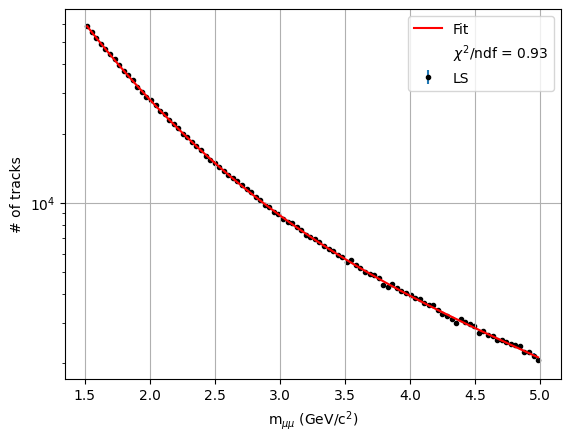

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

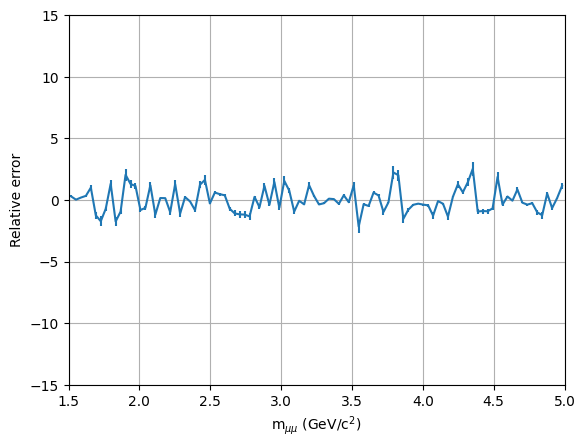

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_data = y_data[y_data > 0]
y_error = y_error[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

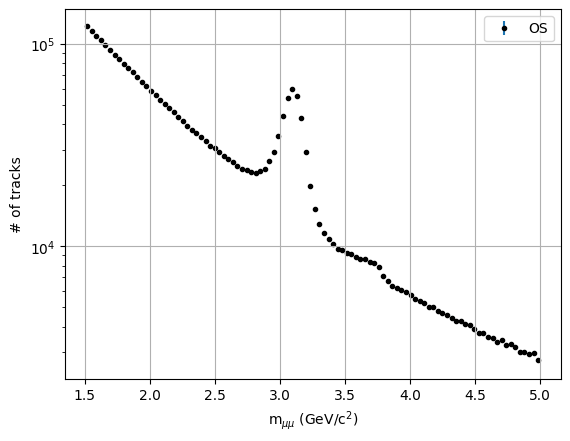

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [46367.62976128137, 3.096170067755317, 0.07185902316720785, 1104.990221199994, 3.6869172425769556, 0.07333649003447251, 11.738835153107289, 10.27169136193641, 9.137565066454693, 8.811066670991785, 7.912394462888063]
pcov: 
 [[ 9.99439845e+04  2.67794150e-02 -9.75887543e-02  1.19205883e+03
  -1.07177427e-01  2.06766734e-01 -5.72988588e-02 -6.94772564e-02
  -2.59124376e-01 -1.64797810e-01 -1.09996948e-01]
 [ 2.67794150e-02  2.82992198e-07 -1.19263281e-07 -2.24972498e-03
   2.72795075e-07 -5.11504674e-07  5.67984533e-08  3.43977124e-07
   6.70105285e-07  3.59906846e-07  4.41893180e-07]
 [-9.75887543e-02 -1.19263281e-07  3.64888219e-07  9.68803048e-03
  -5.40340648e-07  1.16136968e-06 -3.19522145e-07 -8.58003443e-07
  -2.15366367e-06 -1.34675083e-06 -9.14755220e-07]
 [ 1.19205883e+03 -2.24972498e-03  9.68803048e-03  1.66103597e+04
   1.15665027e-01 -6.49585787e-01 -3.99520899e-02 -5.07308500e-02
  -2.34159235e-01 -2.19788763e-01  1.21156257e-01]
 [-1.07177427e-01  2.72795075e-07 -5

fit error : 341.400563736318


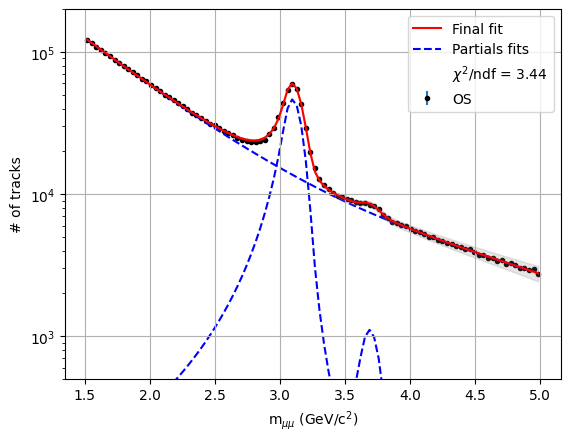

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(500, 200000)
plt.grid(True)

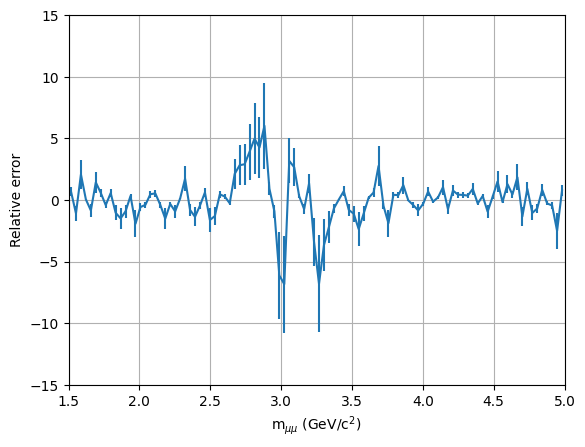

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
# Derivatives

def intervals(rel, alphaL, alphaR):
    I1 = rel < -1 * alphaL
    I2 = (rel >= -1 * alphaL) * (rel <= alphaR)
    I3 = rel > alphaR
    return I1, I2, I3


def dcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = ((nL/np.abs(alphaL))**nL*np.exp(-np.abs(alphaL)**2/2)/(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)[I1]
    res[I2] = (np.exp(-(-mu + x)**2/(2*sig**2)))                                                                             [I2]
    res[I3] = ((nR/np.abs(alphaR))**nR*np.exp(-np.abs(alphaR)**2/2)/(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR)[I3]
    return res

def dcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = (-N*nL*(nL/np.abs(alphaL))**nL*np.exp(-np.abs(alphaL)**2/2)/(sig*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)) [I1]
    res[I2] = (-N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2)                                                                                                                   ) [I2]
    res[I3] = (N*nR*(nR/np.abs(alphaR))**nR*np.exp(-np.abs(alphaR)**2/2)/(sig*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR) ) [I3]
    return res

def dcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = (-N*nL*(nL/np.abs(alphaL))**nL*(-mu + x)*np.exp(-np.abs(alphaL)**2/2)/(sig**2*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)) [I1]
    res[I2] = (N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3                                                                                                                                     ) [I2]
    res[I3] = (N*nR*(nR/np.abs(alphaR))**nR*(-mu + x)*np.exp(-np.abs(alphaR)**2/2)/(sig**2*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR) ) [I3]
    return res

def IdcbdN(x, *args):
    return quad(dcbdN, start, stop, args=args)[0]

def Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
    return quad(dcbdmu, start, stop, args=args)[0]

def Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
    return quad(dcbdsig, start, stop, args=args)[0]

def sig2cb(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    return IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0,0]
    +Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1,1]
    +Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2,2]
    +2*IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[0, 1])
    +2*IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[0, 2])
    +2*Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[1, 2])
    
N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = np.sqrt(sig2cb(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])) / ((stop - start)/bins)
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi)

N_JPsi =  308357.9615563824  +/-  2102.415748995571


/tmp/ipykernel_20458/702439652.py:16: RuntimeWarning: invalid value encountered in power
  res[I1] = ((nL/np.abs(alphaL))**nL*np.exp(-np.abs(alphaL)**2/2)/(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)[I1]
/tmp/ipykernel_20458/702439652.py:18: RuntimeWarning: invalid value encountered in power
  res[I3] = ((nR/np.abs(alphaR))**nR*np.exp(-np.abs(alphaR)**2/2)/(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR)[I3]
